elbow method

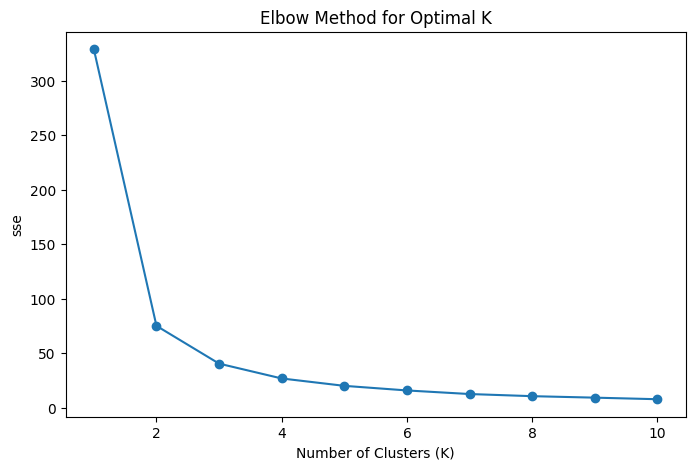

In [101]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
# run k means for a range of k values
sse = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Explicitly set n_init
    kmeans.fit(rfm_scalled)
    sse.append(kmeans.inertia_)

# let's plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('sse')
plt.show()

In [102]:
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")

kl.elbow

np.int64(2)

Silhouette Coefficient

In [103]:
optimal_k = 2

# Fit the K-Means model
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(rfm_scalled)

# gotta assign the clusters to df
rfm['Cluster'] = kmeans.labels_

In [104]:
numeric_columns = ['Recency', 'Frequency', 'Monetary']
cluster_summary = rfm.groupby('Cluster')[numeric_columns].mean()

# Display the summary
print(cluster_summary)

            Recency  Frequency     Monetary
Cluster                                    
0         39.544073   6.123708  2364.744168
1        247.650647   1.888170   480.644640


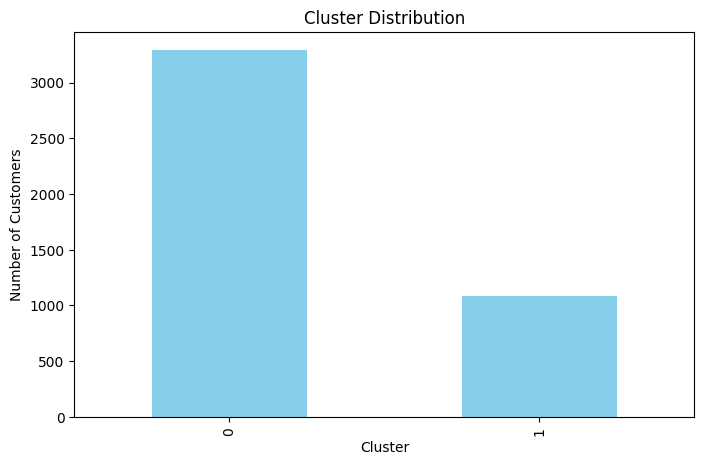

In [105]:
rfm['Cluster'].value_counts().plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

In [107]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensions to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scalled)  # Using the scaled data

# Add the PCA components to the DataFrame (this took many tries)
rfm['PCA1'] = pca_components[:, 0]
rfm['PCA2'] = pca_components[:, 1]

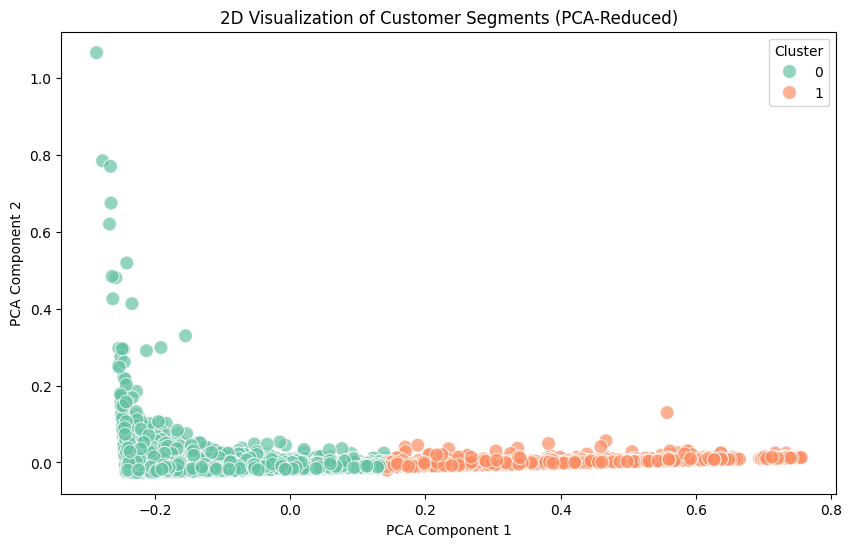

In [108]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=rfm, palette='Set2', s=100, alpha=0.7)

# labels/titles
plt.title('2D Visualization of Customer Segments (PCA-Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()